# Geometric Brownian Motion Path Simulation

Imports:

In [1]:
import numpy as np
from scipy.stats.distributions import lognorm
import matplotlib.pyplot as plt

## Method 1

In [2]:
class GeometricBrownianMotion:
    def __init__(self, mu: float = 0.0, sigma: float = 1.0):
        self.mu = mu
        self.sigma = sigma

    def simulate(self, t, n):
        """
        Simulate `n` paths of the Geometric Brownian Motion.
        t: np.array
        n: int

        returns: np.array
        """
        dt = np.concatenate((t[0:1], np.diff(t)))
        # dW = np.random.normal(size=(n, m)) * np.sqrt(dt)
        dW = (np.random.normal(size=(t.size, n)).T * np.sqrt(dt)).T
        W = np.cumsum(dW, axis=0)
        return np.exp(self.sigma * W.T + (self.mu - self.sigma**2 / 2) * t).T

    def distribution(self, t):
        """
        Return the distribution of the Geometric Brownian Motion at time `t`.
        t: float

        returns: scipy.stats.lognorm
        """
        mu_t = (self.mu - self.sigma**2 / 2) * t
        sigma_t = self.sigma * np.sqrt(t)
        return lognorm(scale=np.exp(mu_t), s=sigma_t)

In [3]:
r = 0.02
sigma = 0.15
gbm = GeometricBrownianMotion(mu=r, sigma=sigma)
t = np.linspace(0, 5, 12 * 5)
X = gbm.simulate(t, 50)
X.shape

(60, 50)

Text(0, 0.5, 'Stock Price')

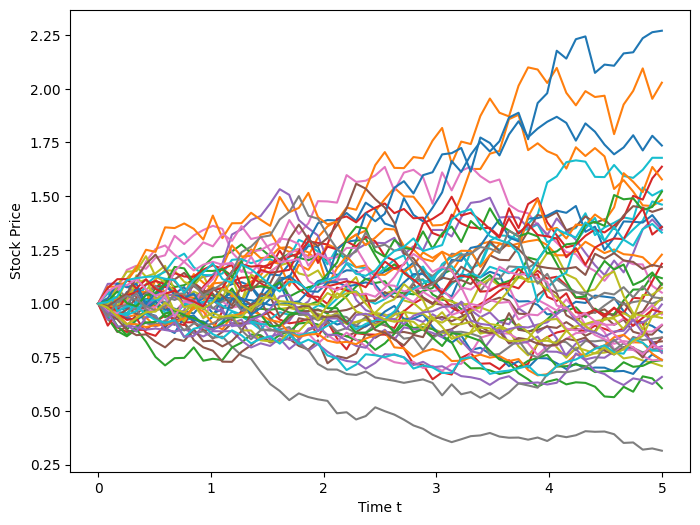

In [4]:
figsize = (8, 6)
plt.figure(figsize=figsize)
plt.plot(t, X)
plt.xlabel("Time t")
plt.ylabel("Stock Price")

Text(0, 0.5, 'Exercise Value')

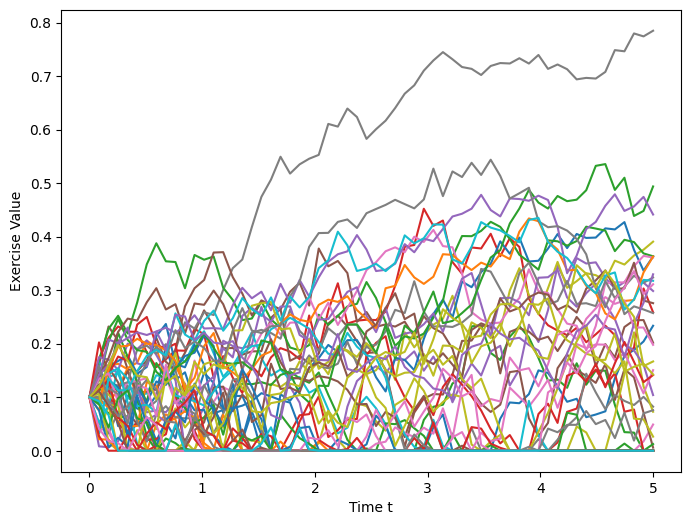

In [5]:
def exercise_value(s):
    return np.maximum(1.1 - s, 0)
plt.figure(figsize=figsize)
plt.plot(t, exercise_value(X))
plt.xlabel("Time t")
plt.ylabel("Exercise Value")

## Method 2

### Original Stochastic Differential Equation:

\begin{equation}
dS_t = \mu S_t dt + \sigma S_t dW_t
\end{equation}

### Integrated form:

\begin{align*}
- \log S_t &= \log S_0 + \int_{t_0}^{t} \left( \mu - \frac{\sigma^2}{2} \right) ds + \int_{t_0}^{t} \sigma dW_s \\
- \log S_t &= \log S_0 + \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t \\
- \log S_t &\sim \mathcal{N} \left( \log S_0 + \left( \mu - \frac{\sigma^2}{2} \right) t, \sigma^2 t \right)
\end{align*}


### Explicit expression:

\begin{equation}
S_t = S_0 e^{\left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t}
\end{equation}


In [6]:
def simulate_geometric_brownian_motion_paths(S0, sigma, mu, T, n=1000, M = 100, plot=False):
    dt = T / n
    # simulation using numpy arrays
    St = np.exp(
        (mu - sigma ** 2 / 2) * dt
        + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
    )

    # include array of 1's
    St = np.vstack([np.ones(M), St])

    # multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
    St = S0 * St.cumprod(axis=0)

    if plot:
        # Define time interval correctly 
        time = np.linspace(0,T,n+1)

        # Require numpy array that is the same shape as St
        tt = np.full(shape=(M,n+1), fill_value=time).T

        plt.plot(tt, St)
        plt.xlabel("Years $(t)$")
        plt.ylabel("Stock Price $(S_t)$")
        plt.title(
            f"Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {S0}, \mu = {mu}, \sigma = {sigma}$"
        )
        plt.show()
    return St

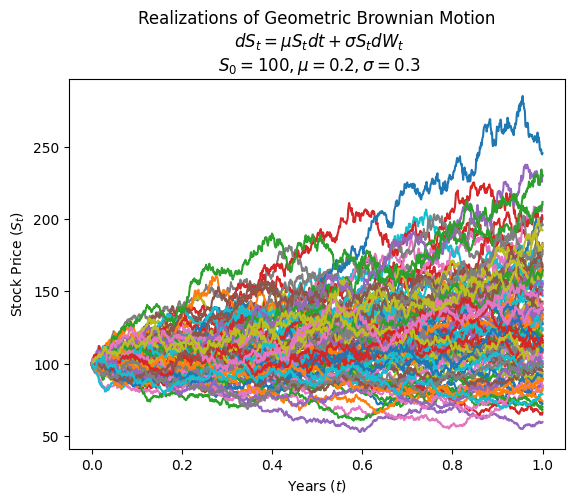

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [ 99.28895306, 100.60179202, 100.91888834, ...,  98.86734354,
        100.34568322,  99.28161735],
       [ 98.79318678, 100.1953846 , 100.46757961, ...,  98.34242855,
        100.19837657,  99.78418238],
       ...,
       [135.90969522, 139.08556751, 122.96544366, ...,  99.58988251,
        179.91625428,  79.43921664],
       [137.50944173, 140.88676044, 124.0008474 , ...,  98.82835454,
        182.84478651,  78.99839744],
       [137.16162382, 141.58950241, 124.57172287, ...,  98.04717359,
        181.97974943,  78.8971754 ]])

In [7]:
###### Example ######
# Parameters
# drift coefficent
mu = 0.2
# number of steps
n = 100
# time in years
T = 1
# number of sims
M = 100
# initial stock price
S0 = 100
# volatility
sigma = 0.3

simulate_geometric_brownian_motion_paths(S0, sigma, mu, T, plot=True)

Reference:
admin (n.d.). Simulating Geometric Brownian Motion (GBM) in Python – QuantPy. [online] Available at: https://quantpy.com.au/stochastic-calculus/simulating-geometric-brownian-motion-gbm-in-python/.